# Assignment 4 - Temporal Difference Learning

Before you start with this problem:
- Study the corresponding slide deck(s) and consider re-watching the lecture recording(s).
- Internalize the material until you feel confident you can work with them or implement them yourself. Only then start working on this assignment; otherwise, you will waste a lot of time.

---

<div class="alert alert-warning">

**Due-Date:** see Moodle
   
**Constraints**: Operations on SciPy and NumPy arrays only.
  
**Automatic Grading:** 

- Replace the placeholders `# YOUR CODE HERE` `raise NotImplementedError()` / `YOUR ANSWER HERE` with your code / answers.
- make sure to remove all `raise NotImplementedError()` statements
- Put results in the corresponding variable; otherwise, we will not grade your solution (i.e., we assign 0 points).
- Do not delete cells.
    
**Submission:** Submit the notebook via Moodle.
- naming convention: `k<8 digits of student ID>.ipynb`
- correct naming for student with id k01234567: k01234567.ipynb
- some examples of incorrectly named submissions:
    - k1234567.ipynb (7 digits)
    - k01234567.pdf (converted to pdf)
    - k01234567.html (converted to html)
    - 01234567.ipynb (k is missing)
    - k01324567.ipynb (incorrect student ID)
    -  ...
- notbooks that cannot be assign automatically will not be graded
  
**Questions?** Post it into the forum!
</div>

<div class="alert alert-info">

In the fourth assignment, you will implement algorithms that were presented in the first lecture on temporal difference methods. You can gain 28 points in total. Please make sure that you do not overlook any of the questions.

<br>

To complete this exercise, read the notebook carefully from beginning to end and fill out coding parts and answer questions marked with **TODO**.

<br>

To make sure you do not forget any **TODO**s in this rather long notebook, here is a list:

- (1) Implement TD(0) (Policy Evaluation) (3 Points)
- (2) Implement SARSA (Policy Improvement) (5 Points)
- (3) Implement Q-Learning (Policy Improvement) (5 Points)
- (4) Implement Expected-SARSA (Policy Improvement) (5 Points)
- (5) Questions (10 Points)

**Do not forget to reset the kernel, and run all the code cells successfully, before saving and submitting the assignment!**
</div>

# Temporal Difference Learning
We will use the `Cliff` environment as featured in the book. It is designed to illustrate the differences of different temporal difference learning methods. You will need to implement evaluation and control algorithms.

## (1) TD(0) policy evaluation (3 points)

We will use an external library here, that you got when you downloaded the assingment from MOODLE. The directory `gym_gridworlds` should be a subdirectory of the folder that you started the Jupyter notebook server in.

Your first task is to implement the TD(0) policy evaluation algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
from collections import defaultdict
import gym_gridworlds as gg
from typing import List, Tuple, Dict
import testing

np.set_printoptions(linewidth=200)

In [2]:
def td_policy_evaluation(
    rng: np.random._generator.Generator,
    env: gym.Env,
    policy: np.ndarray,
    num_episodes: int,
    gamma: float = 0.999,
    alpha: float = 0.1,
    seed: int = 1234,
) -> Dict[int, float]:
    """
    TD(0) evaluation algorithm, which calculates the value function
    for a given policy.

    Args:
        rng: random number generator
        env: the openai gym environment
        policy: the policy to be evaluated
        num_episodes: number of episodes to sample
        gamma: the discount factor
        alpha: step size

    Returns:
        the value function associated with 'policy'
    """
    V = defaultdict(lambda: 0)
    actions = np.arange(env.action_space.n)
    for si in range(1, num_episodes + 1):
        state, _ = env.reset(seed=seed)
        done = False
        # TODO
        # while not done:
        # action = rng.choice(actions, p=policy[state])
        # YOUR CODE HERE
        while not done:
            action = rng.choice(actions, p=policy[state])
            
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            
            V[state] += alpha * (reward + gamma * V[next_state] - V[state])
            
            state = next_state
            
            if done:
                break
    return V

In [3]:
# let's create an environment
cliff_env = gym.make("Cliff-v0")

num_episodes = 1
alpha = 0.9
gamma = 0.999
epsilon = 0.1
seed = 1234 # Do not change this value!

# let's set a random see
seed_sequence = np.random.SeedSequence(seed)
rng = np.random.default_rng(seed_sequence)

# let's create the example policy
policy = gg.random_policy(cliff_env)

# and now let's see how good the example policy really is
policy_value = td_policy_evaluation(
    rng=rng,
    env=cliff_env,
    policy=policy,
    num_episodes=num_episodes,
    gamma=gamma,
    alpha=alpha,
    seed=seed,
)

assert len(policy_value) > 0, "Your implementation generates an empty value function"
for state, val in policy_value.items():
    assert testing.is_type(state, [np.int64, int])
    assert testing.is_type(val, [float, int])



### Now let's try TD(0) to evaluate the random policy


FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
SHHHHHHHHHHG


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.ncol to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.ncol` for environment variables or `env.get_wrapper_attr('ncol')` that will search the reminding wrappers.
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.nrow to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.nrow` for environment variables or `env.get_wrapper_attr('nrow')` that will search the reminding wrappers.
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.desc to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can 

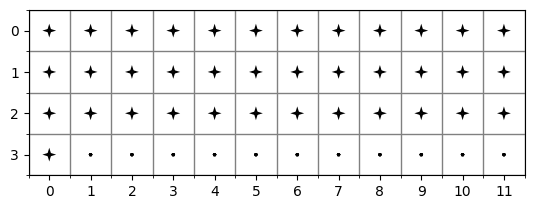

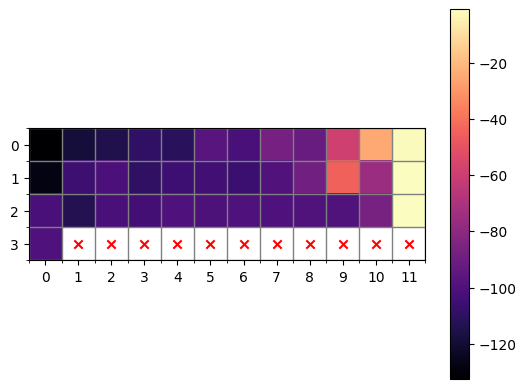

In [4]:
cliff_env = gym.make("Cliff-v0")
cliff_env.reset()
cliff_env.render()

num_episodes = 1000
alpha = 0.9
gamma = 0.999
epsilon = 0.1
seed = 9928

seed_sequence = np.random.SeedSequence(seed)
rng = np.random.default_rng(seed_sequence)

policy = gg.random_policy(cliff_env)
V = td_policy_evaluation(
    rng=rng,
    env=cliff_env,
    policy=policy,
    num_episodes=num_episodes,
    gamma=gamma,
    alpha=alpha,
    seed=seed,
)

gg.plot_policy(cliff_env, policy)
gg.plot_value_function(cliff_env, V, vmax=-1)

In [5]:
def eps_greedy_from_qs(
    rng: np.random._generator.Generator,
    qs: np.ndarray,
    epsilon: float,
):
    """
    a helper functions that define epsilon greedy policies
    from Q values. this function breaks ties uniformly at
    random (if qs are all equal) you should use it where appropriate!

    Args:
        rng: random number generator
        qs: an action-value function
        epsilon: probability of selecting a random action

    Returns:
        policy

    """
    # find all currently optimal actions
    optimal_actions = np.argwhere(qs == np.amax(qs))

    # choose any of the optimal actions uniformly at random
    optimal_action = rng.choice(optimal_actions)

    # build an eps-soft policy:

    # compute eps/A(s)
    eps_p = epsilon / len(qs)

    # fill empty array of the same shape as 'qs' with eps/|A(s)|
    ps = np.full_like(qs, eps_p)

    # assign most probability mass to optimal action
    ps[optimal_action] += 1 - epsilon
    return ps

## (2) SARSA (5 Points)
Your task is to implement SARSA, and test it on the Cliff environment.

In [6]:
def sarsa(
    rng: np.random._generator.Generator,
    env: gym.Env,
    num_episodes: int,
    gamma: float = 0.999,
    alpha: float = 0.1,
    epsilon: float = 0.1,
    seed: int = 1234,
) -> Dict[int, float]:
    """
    SARSA algorithm, which calculates the value function
    and a policy.

    Args:
        rng: random number generator
        env: the openai gym environment
        num_episodes: number of episodes to sample
        gamma: the discount factor
        alpha: step size
        epsilon: probability of random action

    Returns:
        the policy
        the state-action value function
    """

    # this is how we store the state-action value function
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    # this is simply a helper array that helps us sample from available actions, given a policy
    actions = np.arange(env.action_space.n)

    for si in range(1, num_episodes + 1):
        if si % 10000 == 0:
            print("{}/{} Episodes".format(si, num_episodes))

        state, _ = env.reset(seed=seed)
        # TODO
        # a = ? -> a sample from an eps-greedy policy,
        # based on the current Q values
        # you may want use the helper function defined above, to do this conveniently

        # done = False
        # while not done:
        # TODO

        # YOUR CODE HERE
        a = rng.choice(actions, p=eps_greedy_from_qs(rng, Q[state], epsilon))
        
        done = False
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            
            if not done:
                next_a = rng.choice(actions, p=eps_greedy_from_qs(rng, Q[next_state], epsilon))
                
                Q[state][a] += alpha * (reward + gamma * Q[next_state][next_a] - Q[state][a])
                
                state = next_state
                a = next_a
            else:
                Q[state][a] += alpha * (reward - Q[state][a])

    # after all the episodes, there might be states missing from 'policy', as exploration
    # could have missed some states. so if we have not encountered a state yet, behave randomly
    policy = defaultdict(lambda: np.ones(env.action_space.n) / env.action_space.n)

    # make a deterministic policy, based on the Q values
    for s, qs in Q.items():
        policy[s] = np.eye(env.action_space.n)[np.argmax(qs)]
    return policy, Q

In [7]:
# let's create an environment
cliff_env = gym.make("Cliff-v0")

num_episodes = 1
alpha = 0.1
gamma = 0.999
epsilon = 0.5
seed = 23423

# let's set a random see
seed_sequence = np.random.SeedSequence(seed)
rng = np.random.default_rng(seed_sequence)

# and now let's see how good the example policy really is
policy, Q = sarsa(
    rng=rng,
    env=cliff_env,
    num_episodes=num_episodes,
    gamma=gamma,
    alpha=alpha,
    epsilon=epsilon,
    seed=seed,
)

assert len(Q) > 0, "Your implementation generates an empty value function"
for state, val in Q.items():
    assert testing.is_type(state, [np.int64, int])
    assert testing.is_type(val, np.ndarray)



### Setup and Run



------------------------------
SARSA
num_episodes 5000
alpha 0.1
gamma 0.999


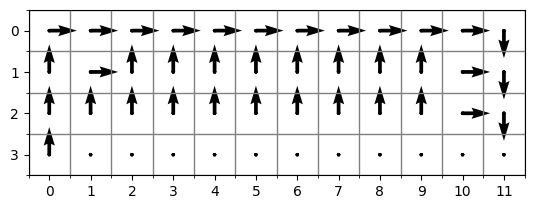

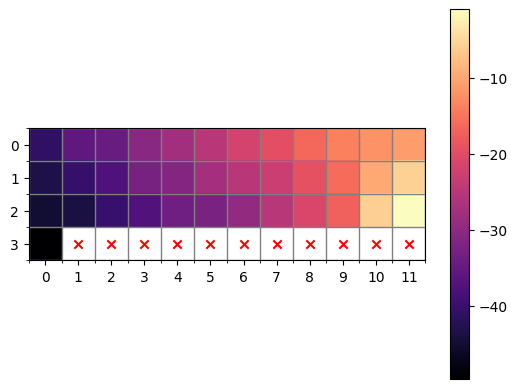

In [8]:
# let's create an environment
cliff_env = gym.make("Cliff-v0")

# SARSA needs many episodes
num_episodes = 5000
# SARSA needs a small step size
alpha = 0.1
gamma = 0.999
# SARSA needs to explore a lot with this small amount of episodes
# if this is set too low, we'll end up with policies that will
# produce infinite loops, once we try to evaluate the policy with
# TD policy evaluation!
# (i.e. policies that loop between two or more states)
epsilon = 0.1
seed = 7243

# let's set a random see
seed_sequence = np.random.SeedSequence(seed)
rng = np.random.default_rng(seed_sequence)

epsilon = 0.5

print("\n\n" + "-" * 30)
print("SARSA")
print("num_episodes", num_episodes)
print("alpha", alpha)
print("gamma", gamma)
policy, Q = sarsa(
    rng=rng,
    env=cliff_env,
    num_episodes=num_episodes,
    gamma=gamma,
    alpha=alpha,
    epsilon=epsilon,
    seed=seed,
)

V = defaultdict(lambda: 0)
for s, qs in Q.items():
    V[s] = np.max(qs)

gg.plot_policy(cliff_env, policy)
gg.plot_value_function(cliff_env, V, vmax=-1)

## (3) Q-Learning (5 points)
Your task is to implement Q-Learning, and test it on the `Cliff` environment.

In [9]:
def q_learning(
    rng: np.random._generator.Generator,
    env: gym.Env,
    num_episodes: int,
    gamma: float = 0.999,
    alpha: float = 0.1,
    epsilon: float = 0.1,
    seed: int = 1234,
) -> Dict[int, float]:
    """
    Q-LEARNING algorithm, which calculates the value function
    and a policy.

    Args:
        rng: random number generator
        env: the openai gym environment
        num_episodes: number of episodes to sample
        gamma: the discount factor
        alpha: step size
        epsilon: probability of random action

    Returns:
        the policy
        the state-action value function
    """
    # YOUR CODE HERE
    # this is how we store the state-action value function
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    # this is simply a helper array that helps us sample from available actions, given a policy
    actions = np.arange(env.action_space.n)

    for si in range(1, num_episodes + 1):
        if si % 10000 == 0:
            print("{}/{} Episodes".format(si, num_episodes))

        state, _ = env.reset(seed=seed)
        
        done = False
        while not done:
            a = rng.choice(actions, p=eps_greedy_from_qs(rng, Q[state], epsilon))
            
            next_state, reward, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            
            if not done:
                Q[state][a] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state][a])
            else:
                Q[state][a] += alpha * (reward - Q[state][a])
            
            state = next_state

    # after all the episodes, there might be states missing from 'policy', as exploration
    # could have missed some states. so if we have not encountered a state yet, behave randomly
    policy = defaultdict(lambda: np.ones(env.action_space.n) / env.action_space.n)

    # make a deterministic policy, based on the Q values
    for s, qs in Q.items():
        policy[s] = np.eye(env.action_space.n)[np.argmax(qs)]
    
    return policy, Q
    # TODO (look at SARSA to get started)

In [10]:
# let's create an environment
cliff_env = gym.make("Cliff-v0")

num_episodes = 1
alpha = 0.9
gamma = 0.999
epsilon = 0.1
seed = 2398

# let's set a random see
seed_sequence = np.random.SeedSequence(seed)
rng = np.random.default_rng(seed_sequence)

# and now let's see how good the example policy really is
policy, Q = q_learning(
    rng=rng,
    env=cliff_env,
    num_episodes=num_episodes,
    gamma=gamma,
    alpha=alpha,
    epsilon=epsilon,
    seed=seed,
)

assert len(Q) > 0, "Your implementation generates an empty value function"
for state, val in Q.items():
    assert testing.is_type(state, [np.int64, int])
    assert testing.is_type(val, np.ndarray)



### Setup and Run


FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
SHHHHHHHHHHG


------------------------------
Q-Learning
num_episodes 1000
alpha 0.9
gamma 0.999


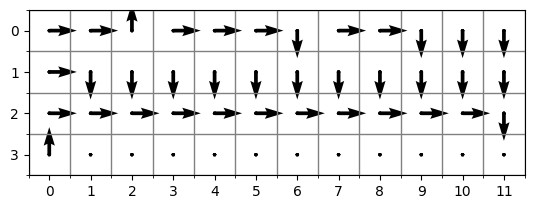

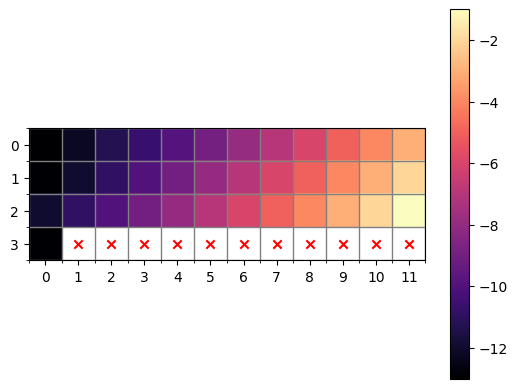

In [11]:
cliff_env = gym.make("Cliff-v0")
cliff_env.reset()
cliff_env.render()

num_episodes = 1000
alpha = 0.9
gamma = 0.999
epsilon = 0.1
seed = 2473

# let's set a random seed
seed_sequence = np.random.SeedSequence(seed)
rng = np.random.default_rng(seed_sequence)

print("\n\n" + "-" * 30)
print("Q-Learning")
print("num_episodes", num_episodes)
print("alpha", alpha)
print("gamma", gamma)

policy, Q = q_learning(
    rng=rng,
    env=cliff_env,
    num_episodes=num_episodes,
    gamma=gamma,
    alpha=alpha,
    epsilon=epsilon,
    seed=seed,
)

V = defaultdict(lambda: 0)
for s, qs in Q.items():
    V[s] = np.max(qs)

gg.plot_policy(cliff_env, policy)
gg.plot_value_function(cliff_env, V, vmax=-1)

## (4) Expected SARSA (5 points)

In [12]:
def expected_sarsa(
    rng: np.random._generator.Generator,
    env: gym.Env,
    num_episodes: int,
    gamma: float = 0.999,
    alpha: float = 0.1,
    epsilon: float = 0.1,
    seed: int = 1234,
) -> Dict[int, float]:
    """
    EXPECTED SARSA algorithm, which calculates the value function
    and a policy.

    Args:
        rng: random number generators
        env: the openai gym environment
        num_episodes: number of episodes to sample
        gamma: the discount factor
        alpha: step size
        epsilon: probability of random action

    Returns:
        the policy
        the state-action value function
    """
    # YOUR CODE HERE
    # this is how we store the state-action value function
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    # this is simply a helper array that helps us sample from available actions, given a policy
    actions = np.arange(env.action_space.n)

    for si in range(1, num_episodes + 1):
        if si % 10000 == 0:
            print("{}/{} Episodes".format(si, num_episodes))

        state, _ = env.reset(seed=seed)
        
        done = False
        while not done:
            policy_a = eps_greedy_from_qs(rng, Q[state], epsilon)
            a = rng.choice(actions, p=policy_a)
            
            next_state, reward, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            
            if not done:
                expected_next_value = np.sum(eps_greedy_from_qs(rng, Q[next_state], epsilon) * Q[next_state])
                
                Q[state][a] += alpha * (reward + gamma * expected_next_value - Q[state][a])
            else:
                Q[state][a] += alpha * (reward - Q[state][a])
            
            state = next_state

    # after all the episodes, there might be states missing from 'policy', as exploration
    # could have missed some states. so if we have not encountered a state yet, behave randomly
    policy = defaultdict(lambda: np.ones(env.action_space.n) / env.action_space.n)

    # make a deterministic policy, based on the Q values
    for s, qs in Q.items():
        policy[s] = np.eye(env.action_space.n)[np.argmax(qs)]
    
    return policy, Q

    # TODO (look at SARSA to get started)

In [13]:
# let's create an environment
cliff_env = gym.make("Cliff-v0")

num_episodes = 1
alpha = 0.9
gamma = 0.999
epsilon = 0.1
seed = 3847

# let's set a random seed
seed_sequence = np.random.SeedSequence(seed)
rng = np.random.default_rng(seed_sequence)

# and now let's see how good the example policy really is
policy, Q = expected_sarsa(
    rng=rng,
    env=cliff_env,
    num_episodes=num_episodes,
    gamma=gamma,
    alpha=alpha,
    epsilon=epsilon,
    seed=seed,
)

assert len(Q) > 0, "Your implementation generates an empty value function"
for state, val in Q.items():
    assert testing.is_type(state, [np.int64, int])
    assert testing.is_type(val, np.ndarray)



### Setup and Run


FFFFFFFFFFFF
FFFFFFFFFFFF
FFFFFFFFFFFF
SHHHHHHHHHHG


------------------------------
Expected SARSA
num_episodes 1000
alpha 0.9
gamma 0.999


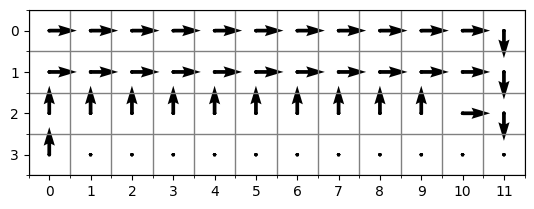

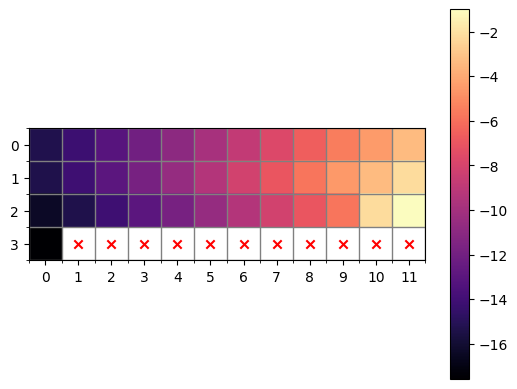

In [14]:
cliff_env = gym.make("Cliff-v0")
cliff_env.reset()
cliff_env.render()


# aha - this is interesting! expected SARSA needs far fewer episodes
# than SARSA!
num_episodes = 1000
alpha = 0.9
gamma = 0.999
epsilon = 0.1
seed = 9867

# let's set a random seed
seed_sequence = np.random.SeedSequence(seed)
rng = np.random.default_rng(seed_sequence)

### Run Algorithm

print("\n\n" + "-" * 30)
print("Expected SARSA")
print("num_episodes", num_episodes)
print("alpha", alpha)
print("gamma", gamma)
policy, Q = expected_sarsa(
    rng=rng,
    env=cliff_env,
    num_episodes=num_episodes,
    gamma=gamma,
    alpha=alpha,
    epsilon=epsilon,
    seed=seed,
)

V = defaultdict(lambda: 0)
for s, qs in Q.items():
    V[s] = np.max(qs)

gg.plot_policy(cliff_env, policy)
gg.plot_value_function(cliff_env, V, vmax=-1)

### Theory questions (10 points)

Answer whether the following statements are true or false (1 point each question)

1. TD methods require a model of the environment (i.e., the dynamics and reward function)
2. TD(0) uses bootstrapping (i.e., they update the value function using previous estimates of the value function)
3. TD and Monte Carlo methods are similar in that they need to wait until the end of an episode to compute updates
4. In practice, TD methods converge faster than Monte Carlo methods on stochastic tasks
5. An off-policy version of Expected Sarsa is equivalent to Q-learning if the target policy is greedy.
6. In the standard Q-learning update ($Q(S,A) \leftarrow Q(S, A) + \alpha [R + \gamma \max_a Q(S', a) - Q(S, A)]$) taking the maximum over previous estimates of $Q$ **does not** lead to positive bias.

In [15]:
# store True or False
results = {
    "1": None,
    "2": None,
    "3": None,
    "4": None,
    "5": None,
    "6": None,
}

# YOUR CODE HERE
# store True or False
results = {
    "1": False, 
    "2": True, 
    "3": False,
    "4": True, 
    "5": True,  
    "6": False,
}

In [16]:
assert testing.is_type(results["1"], bool)

In [17]:
assert testing.is_type(results["2"], bool)

In [18]:
assert testing.is_type(results["3"], bool)

In [19]:
assert testing.is_type(results["4"], bool)

In [20]:
assert testing.is_type(results["5"], bool)

In [21]:
assert testing.is_type(results["6"], bool)

Answer the following questions in **one, short sentence**.
1. Q-learning is considered an off-policy method. What are the target and behavior policies in Q-Learning? (2 points)

<ul>
<li>Target policy (the policy used to select the next action for computing the target value): Greedy policy based on current Q-values (max_a Q(s',a'))
<li>Behavior policy (the policy used for exploration): ε-greedy policy based on current Q-values
</ul>

2. In the cliff walking example: Why does SARSA return a 'safe' path? You may want to consult the book, Example 6.6 if you are stuck. (2 point)

In the cliff walking example, SARSA returns a 'safe' path because it considers the next action that would actually be taken (on-policy), avoiding the cliff by learning to stay away from dangerous areas during exploration.